# Sea Ice Growth #
(adapted from W.F. Weeks book "On Sea Ice", chapter 4)

## Cumulative freezing day relation ##

Weyprecht (1875) observed during an [expedition to Franz-Josef-Land (1872-1874)](http://de.wikipedia.org/wiki/%C3%96sterreichisch-Ungarische_Nordpolexpedition) a relation between the air temperature and the sea ice growth. From time series of the surface air temperature $T_a$ and the sea ice thickness $H$ he derived the following relationsship of the
cumulative freezing days $\Theta$ given in [$^\circ$C days]
$$\Theta=\int_0^t (T_f-T_a)$$ 
and the ice thickness $H$.

## Stefan Problem ##

The physicist Josef Stefan theoretically investigated the problem of ice growth by solving the one-dimensional equation for heat conduction$^1$. He found that the thickness of ice growth depends on the square root of the time. In doing this he made the boundary value assumption that the ice surface temperature equals the surface air temperature. The problem is referred to as the [Stefan problem](http://en.wikipedia.org/wiki/Stefan_problem).
    
[1] J. Stefan (1889), Über die Theorie der Eisbildung, insbesondere über die Eisbildung im Polarmeere, Sitzungsberichte der Österreichischen Akademie der Wissenschaften, 98, 965-983.

## Sea Ice Growth Measurements ##

During a study in 1956 at Thule, Greenland, measurements of ice thicknesses were conducted in order to investigate the flexural strength of ice. "Ponds" were cut in the thick ice and the new ice grown in theses ponds was removed at different times. 

[Anderson (1961)](http://authors.library.caltech.edu/45124/1/Anderson_1961p1170.pdf) used the empirical relation suggested by Zubov (1938,1945)

$$H^2 + a_1H=a_2 \Theta$$

and found that the measurements were best explained for $a_1=5.1$ and $a_2=6.7$ (see below).

Populating the interactive namespace from numpy and matplotlib


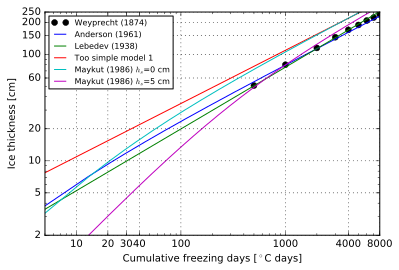

In [9]:
%pylab inline
%config InlineBackend.figure_formats=['svg']

def H_Anderson(Theta):
    """ Sea ice growth parameterization of Anderson (1961)
        based on relation suggested by Zubov (1938,1945).
        
        ANDERSON, DL. 1961. Growth rate of sea ice. J. Glaciol. 3:1170—1172
        """
    a1,a2=5.1,6.7 # best fit to observations
    H=-a1/2+sqrt((a1/2)**2+a2*Theta) # ice thickness H in cm
    return H

def H_Lebedev(Theta):
    """Sea ice growth parameterization of Lebedev (1938)"""
    return 1.38*Theta**0.58
def H_Maykut(Theta,hs):
    """Sea ice growth parameterization of Maykut (1986)"""
    p=13.1*hs+16.8
    return -p/2+sqrt((p/2)**2+12.9*Theta)

def H_Maykut0(Theta):
    T=Theta*24*60.0*60.0
    return sqrt(2.0*k/(rho*L)*T)*100.0

Theta=linspace(5,8000,1000)

k=2.1 # W/m/K
rho=910.0 #kg/m**3
L=333.6*1000.0 # kJ/kg

theta=array([500,1000,2000,3000,4000,5000,6000,7000,8000]) # Found in Zubov
thick=array([51,80,115,145,170,189,208,222,237])
plot(theta,thick,'ko',label='Weyprecht (1874)')
plot(Theta,H_Anderson(Theta),label="Anderson (1961)")
plot(Theta,H_Lebedev(Theta),label="Lebedev (1938)")
plot(Theta,H_Maykut0(Theta),label="Too simple model 1")
plot(Theta,H_Maykut(Theta,0.0),label="Maykut (1986) $h_s$=0 cm")
plot(Theta,H_Maykut(Theta,5.0),label="Maykut (1986) $h_s$=5 cm")

ylabel('Ice thickness [cm]')
xlabel('Cumulative freezing days [$^\circ$C days]')
legend(loc=2,fontsize=8)
ax=gca()
ax.set_xscale("log")
ax.set_yscale("log")
axis([5,1500,2,150])
xticks([10,20,30,40, 100,1000,4000,8000],('10','20','30','40', '100','1000','4000','8000'))
yticks([2, 5,10,20,60,100,150,200,250],('2','5','10','20','60','100','150','200','250'))
grid()
savefig('Empirical_ice_growth.pdf')

## Constants in Maykut's derivation

$$H^2+\frac{2k}{C}H=\frac{2k}{\rho L} \Theta$$

$$H^2 + 16.8 H= 12.9 \Theta$$


In [18]:
C=50 # cal cm⁻1 day^-1 °^-1
k=419.9 # cal °C day^-1
rho_L=65 # cal cm^-3

In [19]:
2*k/C

16.796

In [20]:
2*k/rho_L

12.92

In [ ]:
# 1 cal = 4.1868 J

In [22]:
k*4.1868*100/(24*60*60) # in W/m/K

2.0347654166666667